### **Necessary Libraries**

In [ ]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings


warnings.filterwarnings("ignore")

# **Data Set Explore**

In [140]:
df = pd.read_csv(r"E:\DS and ML\Practice_Project\Data/E-commerce.csv")

In [141]:
df.head()  # Display the first few rows of the DataFrame

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High


In [142]:
df.info()  # Display information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  10000 non-null  int64  
 1   Age                          10000 non-null  int64  
 2   Gender                       10000 non-null  object 
 3   Location                     10000 non-null  object 
 4   Product Category             10000 non-null  object 
 5   Purchase Amount ($)          10000 non-null  float64
 6   Time Spent on Website (min)  10000 non-null  int64  
 7   Device Type                  10000 non-null  object 
 8   Payment Method               10000 non-null  object 
 9   Discount Availed             10000 non-null  bool   
 10  Number of Items Purchased    10000 non-null  int64  
 11  Return Customer              10000 non-null  bool   
 12  Review Score (1-5)           10000 non-null  int64  
 13  Delivery Time (da

In [143]:
duplicates = df.duplicated().sum()  # Count duplicates
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [144]:
df.isna().sum()  # Check for missing values

Customer ID                    0
Age                            0
Gender                         0
Location                       0
Product Category               0
Purchase Amount ($)            0
Time Spent on Website (min)    0
Device Type                    0
Payment Method                 0
Discount Availed               0
Number of Items Purchased      0
Return Customer                0
Review Score (1-5)             0
Delivery Time (days)           0
Subscription Status            0
Customer Satisfaction          0
dtype: int64

In [145]:
df.describe()  # Get descriptive statistics of the DataFrame

,Customer ID,Age,Purchase Amount ($),Time Spent on Website (min),Number of Items Purchased,Review Score (1-5),Delivery Time (days)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,43.789900,503.892494,29.918400,4.998500,2.995100,7.013000
std,2886.89568,15.005521,286.238084,17.002107,2.574988,1.404163,3.721561
min,1.00000,18.000000,5.190000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,31.000000,254.937500,15.000000,3.000000,2.000000,4.000000
50%,5000.50000,44.000000,506.195000,30.000000,5.000000,3.000000,7.000000
75%,7500.25000,57.000000,749.135000,45.000000,7.000000,4.000000,10.000000
max,10000.00000,69.000000,999.980000,59.000000,9.000000,5.000000,13.000000


**Since The Data Seems Clean Let's Deep Dive Into The Analysis**

# **E-commerce Customer Behavior Analysis**

 **Q1: Find Mean, Median, and Mode (Age)**

*Find The Mean,median and mode*

Mean Age: 43.7899, Median Age: 44.0, Mode Age: 51


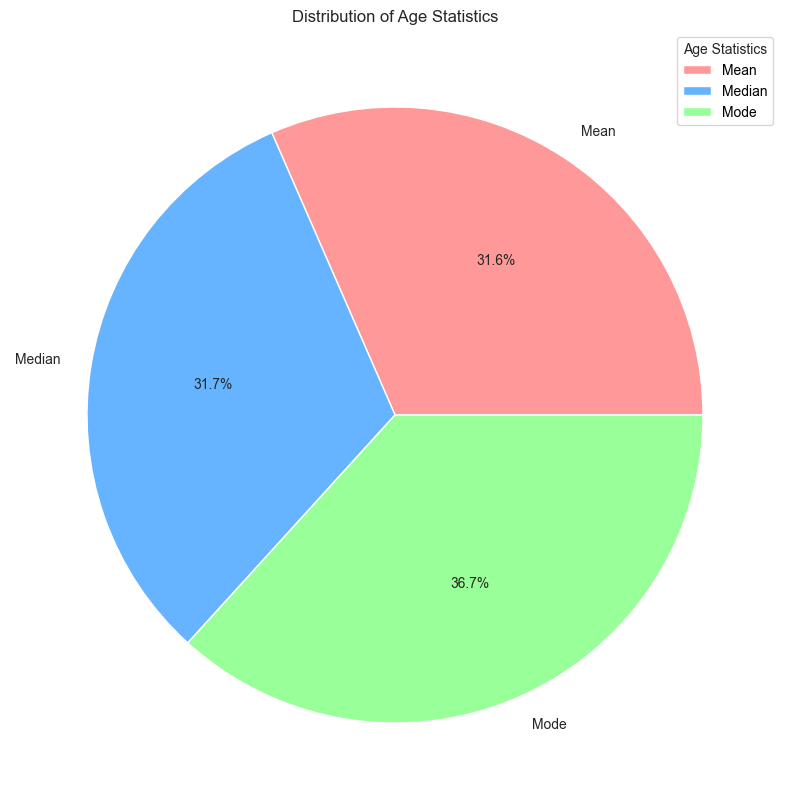

In [146]:
age= [df['Age'].mean(),df['Age'].median(),df['Age'].mode()[0]]
print(f"Mean Age: {age[0]}, Median Age: {age[1]}, Mode Age: {age[2]}")  # Display mean, median, and mode of 'Age'
# Visualizing the distribution of 'Age'
plt.figure(figsize=(10, 10))
colors= ['#FF9999', '#66B3FF', '#99FF99']
plt.pie(age, labels=['Mean', 'Median', 'Mode'], autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Age Statistics')
legend = plt.legend(loc='upper right', title='Age Statistics')
plt.setp(legend.get_texts(), color='black')  # Set legend text color
plt.show()  # Show the pie chart

 **Q2: Find variance, standard deviation, and z-score (Purchase Amount)**

**Find variance**

In [147]:
variance = df['Purchase Amount ($)'].var()
print(f"Variance of Purchase Amount: {variance}")

Variance of Purchase Amount: 81932.24073019298


**Find standard devition**

In [148]:
std = df['Purchase Amount ($)'].std()
print(f"standerd deviation of Purchase Amount: {std}")

standerd deviation of Purchase Amount: 286.23808399685913


**Find Z-Score**

In [149]:
z_scores = (df['Purchase Amount ($)'] - df['Purchase Amount ($)'].mean()) / df['Purchase Amount ($)'].std()
print(f"Z-Scores of Purchase Amount: {z_scores}")

Z-Scores of Purchase Amount: 0      -1.052804
1       0.531192
2       1.606207
3      -0.063942
4      -1.259869
          ...   
9995   -1.413727
9996    1.026829
9997    1.104946
9998   -1.638330
9999   -0.944817
Name: Purchase Amount ($), Length: 10000, dtype: float64


 **Q3: What are the top three product categories based on the number of purchases?**

Top 3 Product Categories by Number of Purchases:
Product Category
Electronics    1309
Clothing       1297
Toys           1288
Name: count, dtype: int64

Average Purchase Amount by Product Category:
Product Category
Books          523.101087
Toys           516.720016
Home           511.546972
Groceries      506.412892
Clothing       498.726700
Sports         493.437076
Beauty         490.852970
Electronics    489.478724
Name: Purchase Amount ($), dtype: float64


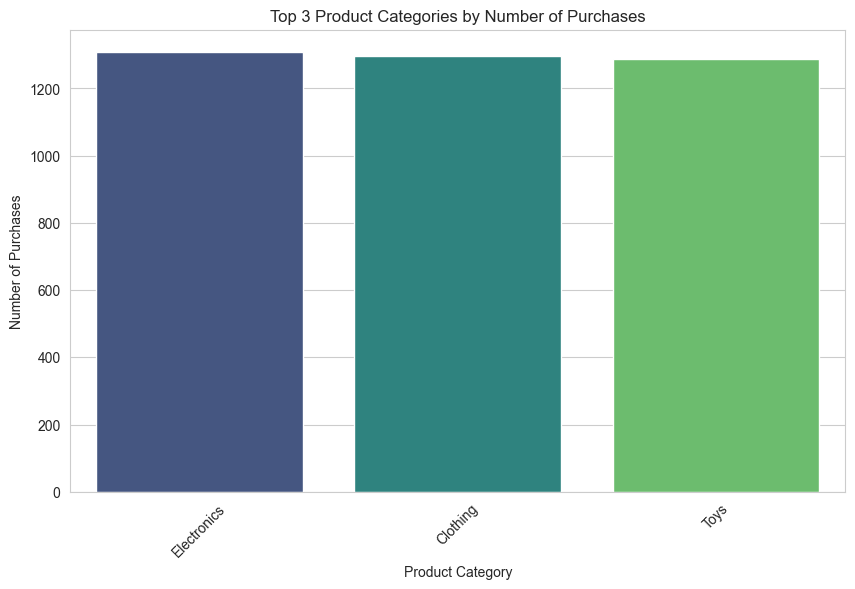

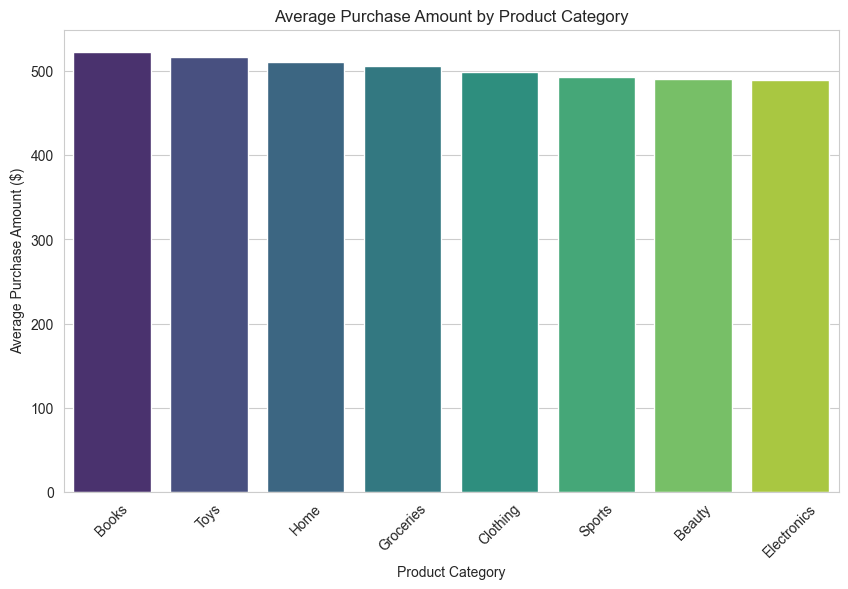

In [150]:

top_categories = df['Product Category'].value_counts().head(3)
print("Top 3 Product Categories by Number of Purchases:")
print(top_categories)

avg_purchase = df.groupby('Product Category')['Purchase Amount ($)'].mean().sort_values(ascending=False)
print("\nAverage Purchase Amount by Product Category:")
print(avg_purchase)
# Visualizing the top 3 product categories
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
plt.title('Top 3 Product Categories by Number of Purchases')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()  # Show the bar chart
# Visualizing the average purchase amount by product category
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_purchase.index, y=avg_purchase.values, palette='viridis')
plt.title('Average Purchase Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase Amount ($)')
plt.xticks(rotation=45)
plt.show()  # Show the bar chart




 **Q4:How many customers are classified as return customers?**

In [151]:
df['Return Customer'].value_counts().sort_values()  # Count of return customers

Return Customer
True     4996
False    5004
Name: count, dtype: int64

 **Q5: What is the average review score given by customers?**

In [152]:
df['Review Score (1-5)'].mean()  # Average review score given by customers

2.9951

**Q6: How doesthe average delivery time vary between subscription statuses (Free,Premium)?**

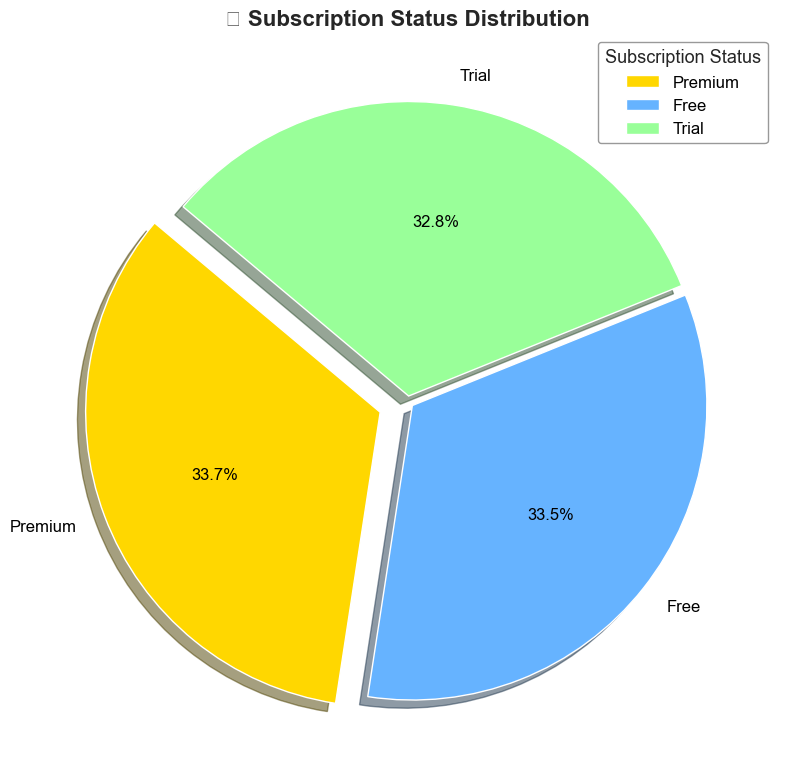

In [153]:
import matplotlib.pyplot as plt

# Get value counts and labels
status_counts = df['Subscription Status'].value_counts()
labels = status_counts.index

# Highlight "Premium" with a larger explode value
explode = [0.1 if label.lower() == 'premium' else 0.02 for label in labels]

# Define colors (Premium gets a gold tone)
colors = ['#FFD700' if label.lower() == 'premium' else color 
          for label, color in zip(labels, ['#FF9999', '#66B3FF', '#99FF99'])]

# Create the pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    status_counts,
    labels=labels,
    autopct='%1.1f%%',
    explode=explode,
    colors=colors,
    startangle=140,
    shadow=True,
    textprops={'fontsize': 12, 'color': 'black'}
)

# Title and layout
plt.title('💎 Subscription Status Distribution', fontsize=16, fontweight='bold')
plt.ylabel('')  # Hide y-axis label

# Legend
legend = plt.legend(
    wedges,
    labels,
    title='Subscription Status',
    loc='upper right',
    fontsize=12,
    title_fontsize=13,
    facecolor='white',
    edgecolor='gray'
)
plt.setp(legend.get_texts(), color='black')

plt.tight_layout()
plt.show()


**Q7: How many customers are subscribed to the service?**

In [154]:
df.head()  # Display the first few rows of the DataFrame
subscribe=df[df['Subscription Status']=='Premium']['Subscription Status'].count()
print("subscribe=",subscribe) 

subscribe= 3369


 **Q8: What percentage of customers used devices to make purchases? (Mobile, Desktop,Tablet)**

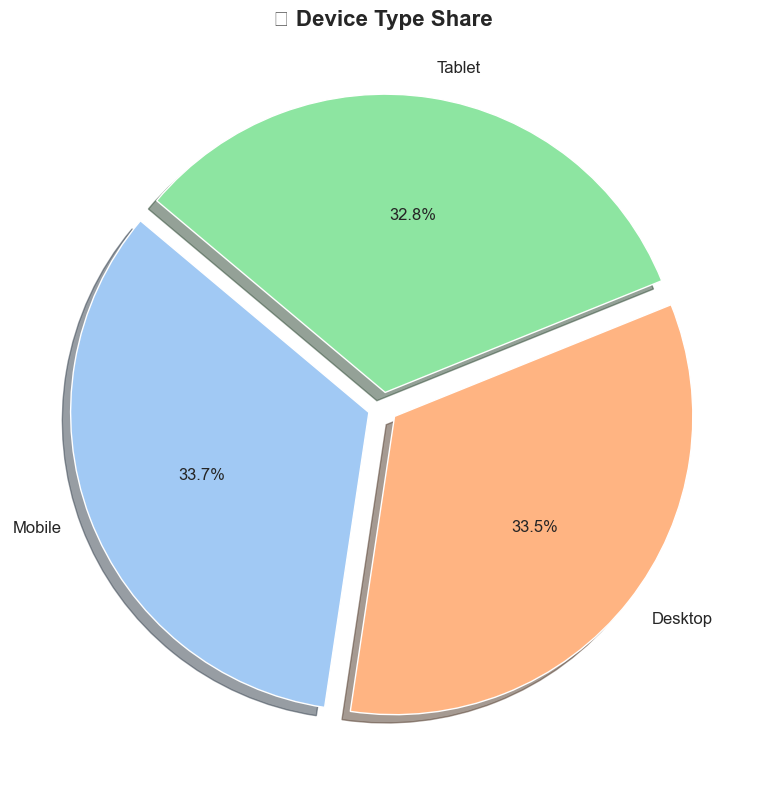

In [155]:

# Count device types
device_counts = df['Device Type'].value_counts()
labels = device_counts.index
sizes = device_counts.values

# Custom colors
colors = sns.color_palette("pastel")[0:len(labels)]

# Explode effect
explode = [0.05] * len(labels)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode, 
    colors=colors, 
    shadow=True,
    textprops={'fontsize': 12}
)

plt.title('📱 Device Type Share', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


In [163]:
df.head()  # Display the first few rows of the DataFrame

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High



**Q9: What isthe average purchase amount for customers who availed discounts compared to those who didnʼt?**

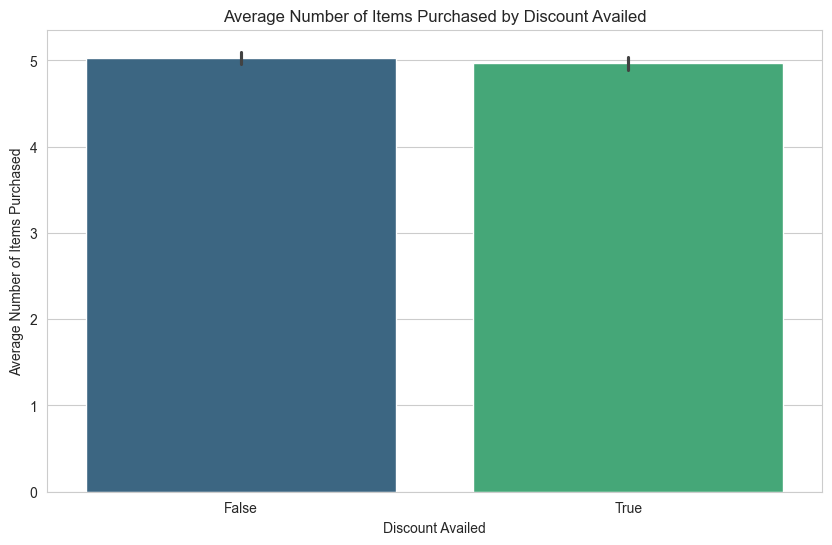

In [157]:
df.groupby('Discount Availed')['Number of Items Purchased'].mean()  # Count of customers by subscription status
# Visualizing the average number of items purchased by discount availed
plt.figure(figsize=(10, 6))
sns.barplot(x='Discount Availed', y='Number of Items Purchased', data=df, palette='viridis')
plt.title('Average Number of Items Purchased by Discount Availed')
plt.xlabel('Discount Availed') 
plt.ylabel('Average Number of Items Purchased')
plt.show()  # Show the bar chart



**Q10: What is the most common payment method used by customers?**

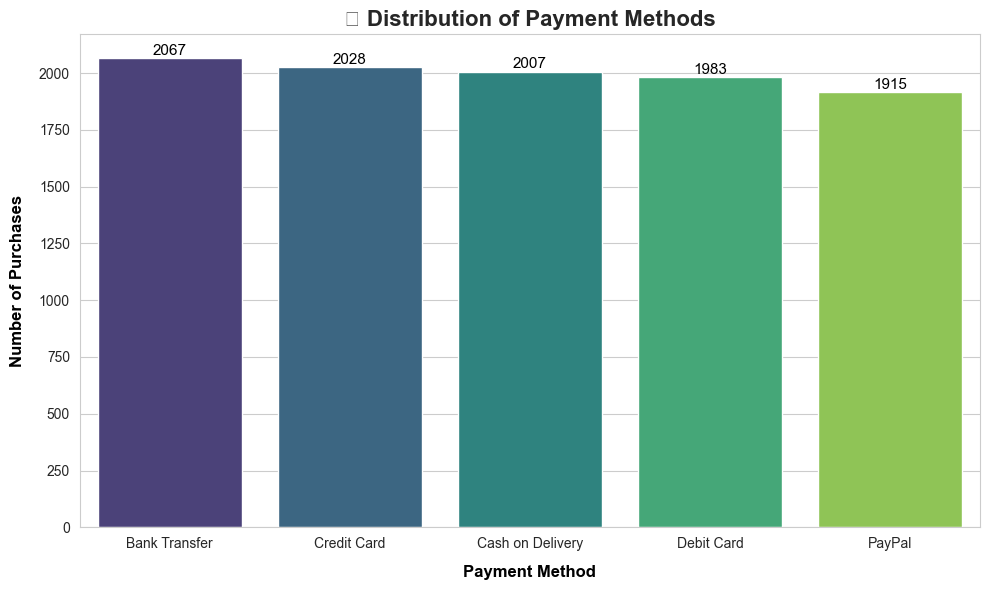

In [158]:
# Get payment method counts
Payment_method = df['Payment Method'].value_counts(ascending=False)

# Set Seaborn style
sns.set_style("whitegrid")

# Create bar plot
plt.figure(figsize=(10, 6))
bar = sns.barplot(x=Payment_method.index, y=Payment_method.values, palette='viridis')

# Add annotations on top of bars
for i, value in enumerate(Payment_method.values):
    bar.text(
        i, value + 1, f"{value}", 
        ha='center', va='bottom', 
        fontsize=11, color='black'
    )

# Set titles and labels
plt.title('💳 Distribution of Payment Methods', fontsize=16, weight='bold')
plt.xlabel('Payment Method', fontsize=12, labelpad=10, color='black', weight='bold')
plt.ylabel('Number of Purchases', fontsize=12,labelpad=10, color='black', weight='bold')
plt.tight_layout()
plt.show()



# **Level 2: Intermediate Insights**

In [159]:
# df.head()  # Display the first few rows of the DataFrame
# df.rename(columns={"Time Spent on Website (min)":"Time Spent on Website"},inplace=True)
# df.rename(columns={"Review Score (1-5)":"Review Score"},inplace=True)
# df.head()  # Display the first few rows of the DataFrame after renaming


**Q1: What are the average review scores of users of the most common payment method?**

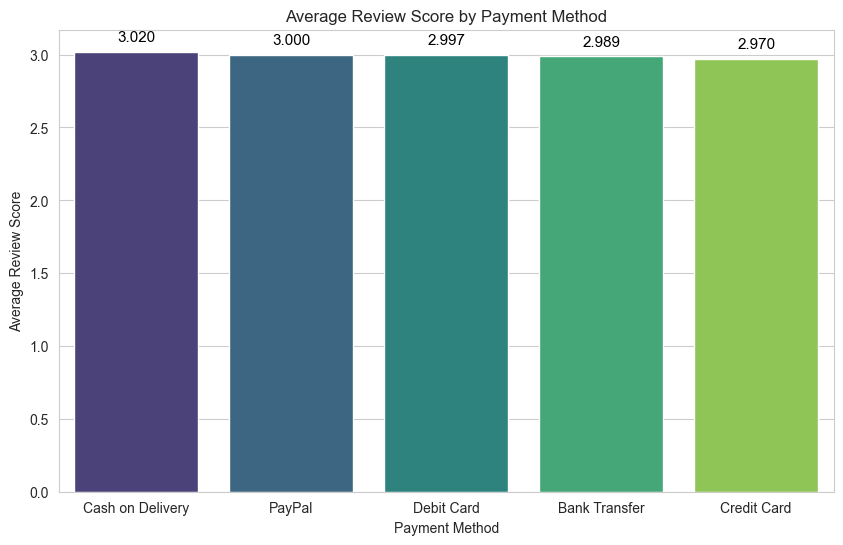

In [212]:
#Average review score for each payment method
satisfaction_payment = df.groupby('Payment Method')['Review Score (1-5)'].mean().sort_values(ascending=False)


# Visualizing the average review score by payment method
plt.figure(figsize=(10, 6))
sns.barplot(x=satisfaction_payment.index, y=satisfaction_payment.values, palette='viridis')
# Add annotations on top of bars
for i, value in enumerate(satisfaction_payment.values):
          plt.text(i, value + 0.05, f"{value:.3f}", ha='center', va='bottom', fontsize=11, color='black')
plt.title('Average Review Score by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Review Score')
plt.show()  # Show the bar chart

**Q2:What is the correlation between time spent on the website and purchase amount? Do customers who spend more time on the website purchase more items?**

In [173]:
df.head()  # Display the first few rows of the DataFrame

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High


In [218]:
# Correlation Analysis
correlation_time_item=df['Time Spent on Website (min)'].corr(df['Number of Items Purchased'])
correlation_time_purchase = df['Time Spent on Website (min)'].corr(df['Purchase Amount ($)'])
print("correlation beetween time spend on website and purchase amount:", correlation_time_item)
print("Correlation between time spent on website and number of items purchased:",correlation_time_purchase )


correlation beetween time spend on website and purchase amount: 0.0001479720454423318
Correlation between time spent on website and number of items purchased: 0.01002480995875273


**Q3: What percentage of customers are satisfied (rating of 4 or 5) and are also return customers?**

Percentage of satisfied customers who are also return customers: 20.08%


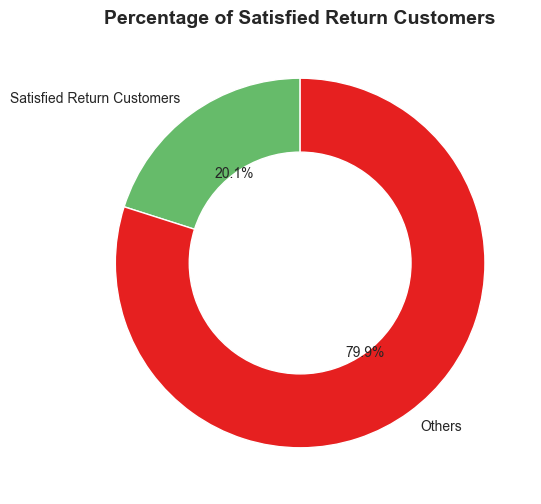

In [190]:
setisfied_customers = df[(df["Review Score (1-5)"] >= 4) & (df["Return Customer"] == True)]
percentage_satisfied = (len(setisfied_customers) / len(df)) * 100
print(f"Percentage of satisfied customers who are also return customers: {percentage_satisfied:.2f}%")
# Visualizing the correlation between time spent on website and number of items purchased
import matplotlib.pyplot as plt

# Values and labels
values = [percentage_satisfied, 100 - percentage_satisfied]
labels = ['Satisfied Return Customers', 'Others']
colors = ['#66BB6A', "#E62020"]

# Donut Chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'width': 0.4})
plt.title('Percentage of Satisfied Return Customers', fontsize=14, weight='bold')
plt.show()




**Q4: What is the relationship between the number of items purchased and customer satisfaction?**

Customer Satisfaction
High      4.947639
Medium    5.058841
Low       4.988707
Name: Number of Items Purchased, dtype: float64


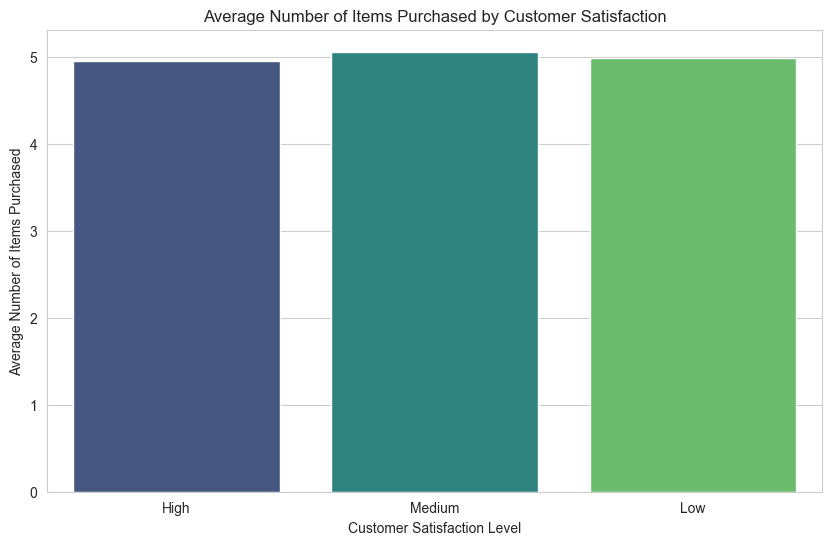

Customer Satisfaction
High      4.947639
Medium    5.058841
Low       4.988707
Name: Number of Items Purchased, dtype: float64


In [191]:
df['Customer Satisfaction'] = pd.Categorical(df['Customer Satisfaction'],categories=['High', 'Medium', 'Low'],ordered=True)

average = df.groupby('Customer Satisfaction')['Number of Items Purchased'].mean()
print(average)
# Visualizing the average number of items purchased by customer satisfaction
plt.figure(figsize=(10, 6))
sns.barplot(x=average.index, y=average.values, palette='viridis')
plt.title('Average Number of Items Purchased by Customer Satisfaction')
plt.xlabel('Customer Satisfaction Level')
plt.ylabel('Average Number of Items Purchased')
plt.show()  # Show the bar chart
print(average)  # Display the average number of items purchased by customer satisfaction

 **Q5: Which location has the 2nd highest average purchase amount?**

The 2nd highest location is Barisal and average purchase amount is:513.6745599999999 


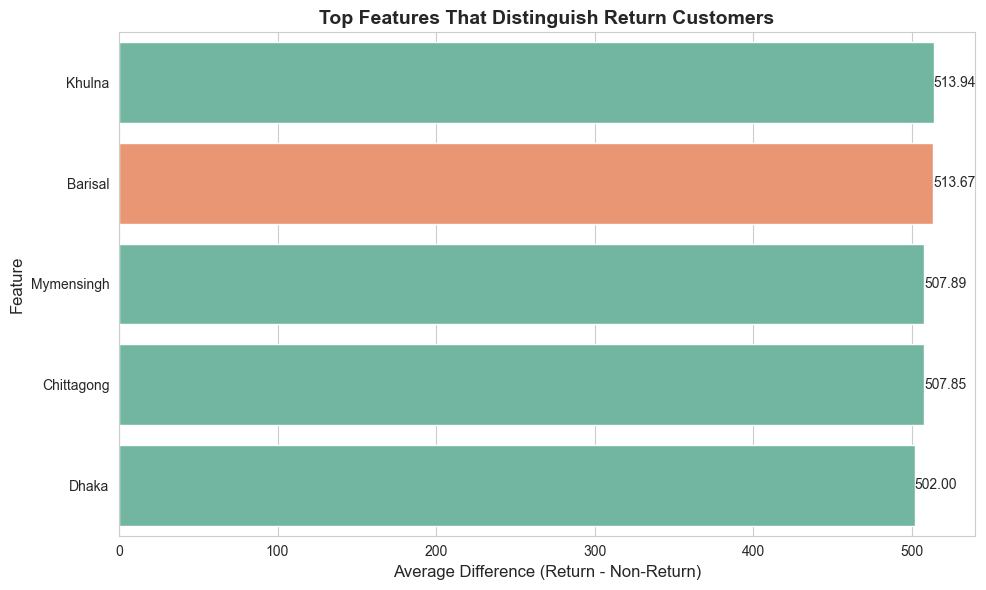

In [210]:
average_purchase_location=df.groupby('Location')['Purchase Amount ($)'].mean().sort_values(ascending=False) # Average purchase amount by location
second_location = average_purchase_location.iloc[1]
second_highest_location = average_purchase_location.nlargest(2).idxmin()  # Get the 2nd highest location
print(f"The 2nd highest location is {second_highest_location} and average purchase amount is:{second_location} ")

#visualizing the average purchase amount by location
# Get top 5 features
top_features = average_purchase_location.nlargest(5)

# Set custom colors: same color for all, one distinct for the 2nd
colors = ['#66c2a5'] * len(top_features)     # base color
colors[1] = '#fc8d62'                        # highlight 2nd feature

# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create horizontal barplot with custom color list
sns.barplot(
    x=top_features.values,
    y=top_features.index,
    palette=colors
)

# Annotate values
for i, value in enumerate(top_features.values):
    plt.text(value, i, f"{value:.2f}", va='center', ha='left', fontsize=10)

# Labels and title
plt.title('Top Features That Distinguish Return Customers', fontsize=14, weight='bold')
plt.xlabel('Average Difference (Return - Non-Return)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


# **Level 3: Critical Thinking Insights**

**Q1:  What  factors  contribute  most  to  a  customer  being  classified  as  a  return  customer?**

The most important features to identify return customers:

Purchase Amount ($)          1.101285
Delivery Time (days)         0.103621
Discount Availed             0.025003
Review Score (1-5)           0.024592
Number of Items Purchased    0.004198
dtype: float64


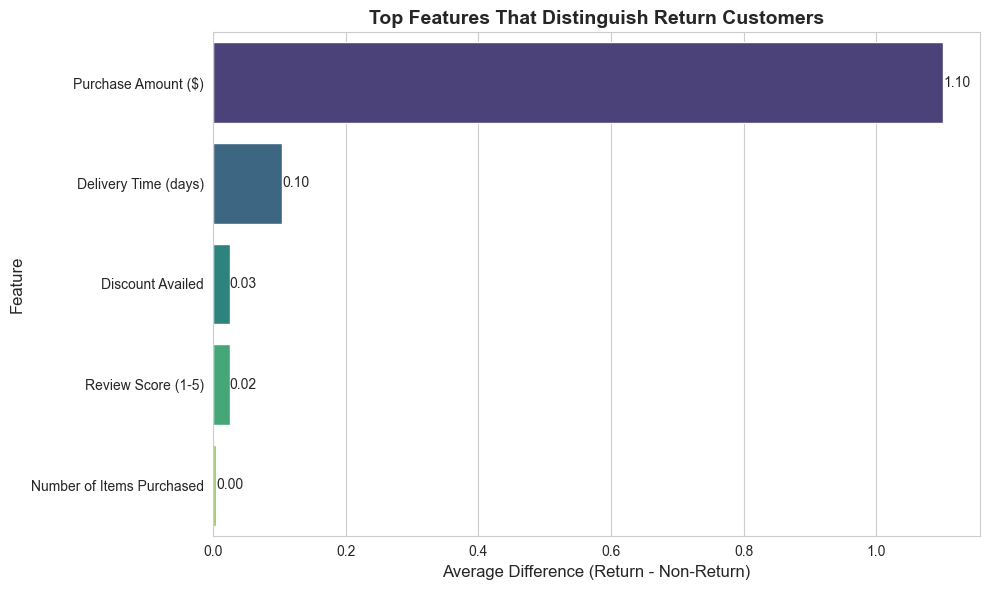

In [ ]:
# Group by 'Return Customer' and calculate the mean for each feature
grouped = df.groupby('Return Customer').mean(numeric_only=True)

# Display the average values for each feature based on return customer status
return_cutomers = (grouped.loc[True] - grouped.loc[False]).sort_values(ascending=False)
print("The most important features to identify return customers:\n") 
print(return_cutomers.head(5))  # Display the top 5 features that differentiate return customers

# Get top 5 features
top_features = return_cutomers.head(5)

# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create horizontal barplot
sns.barplot(
    x=top_features.values,
    y=top_features.index,
    palette='viridis'
)

# Annotate values
for i, value in enumerate(top_features.values):
    plt.text(value, i, f"{value:.2f}", va='center', ha='left', fontsize=10)

# Labels and title
plt.title('Top Features That Distinguish Return Customers', fontsize=14, weight='bold')
plt.xlabel('Average Difference (Return - Non-Return)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

**Q2: How do payment methods influence customer satisfaction and return rates?**

Average review score by payment method:
 Payment Method
Cash on Delivery    3.019930
PayPal              3.000000
Debit Card          2.996974
Bank Transfer       2.988873
Credit Card         2.970414
Name: Review Score (1-5), dtype: float64

Return customer rate by payment method:
 Payment Method
Credit Card         51.232742
Bank Transfer       50.604741
PayPal              49.869452
Debit Card          49.117499
Cash on Delivery    48.928749
Name: Return Customer, dtype: float64


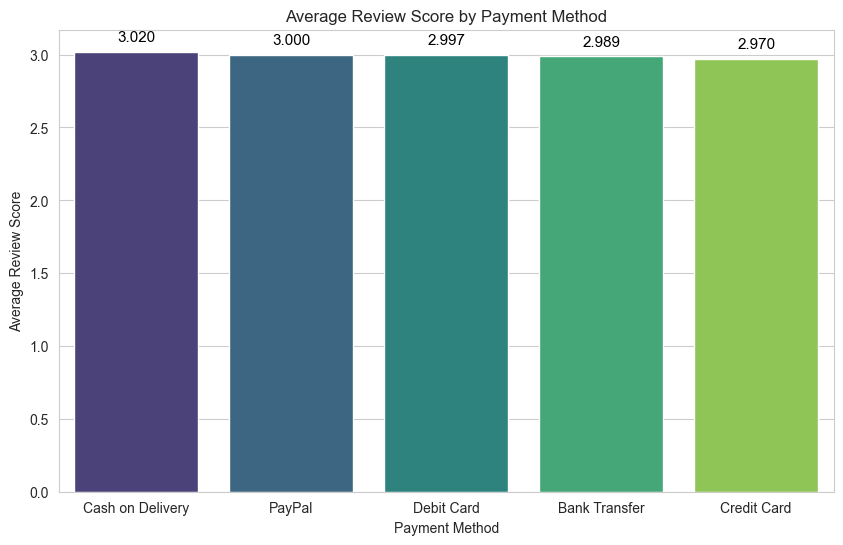

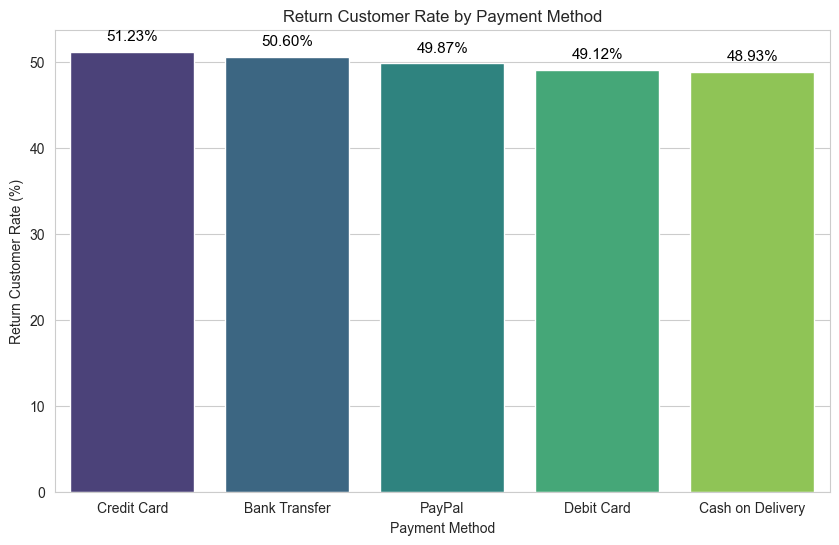

In [198]:
#Average review score for each payment method
satisfaction_payment = df.groupby('Payment Method')['Review Score (1-5)'].mean().sort_values(ascending=False)

#Return customer rate by each payment method
return_rate_payment = df.groupby('Payment Method')['Return Customer'].mean().sort_values(ascending=False) * 100
print("Average review score by payment method:\n", satisfaction_payment)
print("\nReturn customer rate by payment method:\n", return_rate_payment)

# Visualizing the average review score by payment method
plt.figure(figsize=(10, 6))
sns.barplot(x=satisfaction_payment.index, y=satisfaction_payment.values, palette='viridis')
# Add annotations on top of bars
for i, value in enumerate(satisfaction_payment.values):
          plt.text(i, value + 0.05, f"{value:.3f}", ha='center', va='bottom', fontsize=11, color='black')
plt.title('Average Review Score by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Review Score')
plt.show()  # Show the bar chart

# Visualizing the return customer rate by payment method
plt.figure(figsize=(10, 6))
sns.barplot(x=return_rate_payment.index, y=return_rate_payment.values, palette='viridis')
# Add annotations on top of bars
for i, value in enumerate(return_rate_payment.values):
          plt.text(i, value + 1, f"{value:.2f}%", ha='center', va='bottom', fontsize=11, color='black')

plt.title('Return Customer Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Return Customer Rate (%)')
plt.show()  # Show the bar chart



**Q3: How does the location influence both purchase amount and delivery time?**

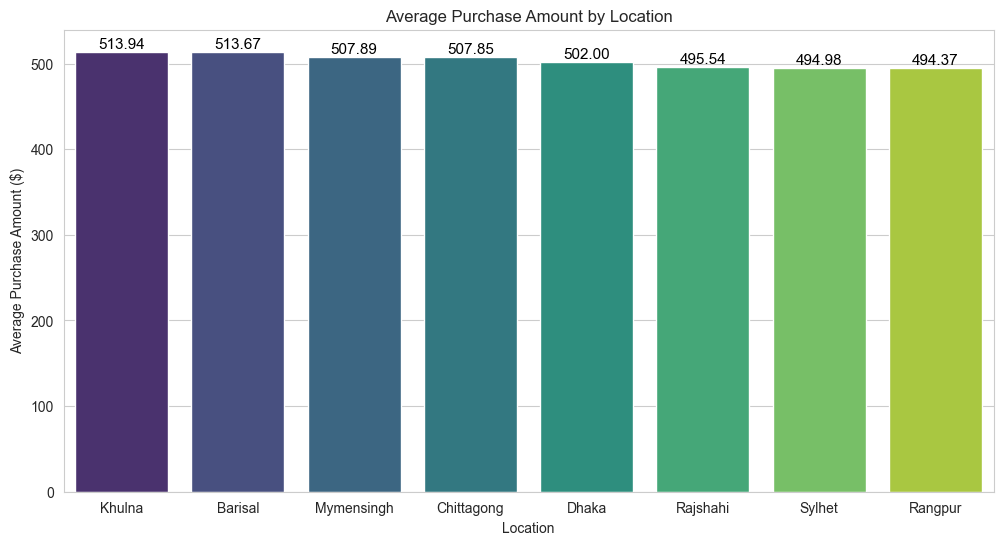

In [201]:
# Group by 'Location' and calculate the mean for 'Purchase Amount ($)' and 'Delivery Time (days)'
# Average purchase amount and delivery time by location
location_status= df.groupby('Location')[['Purchase Amount ($)', 'Delivery Time (days)']].mean().sort_values(by='Purchase Amount ($)', ascending=False)

location_status
# Visualizing the average purchase amount and delivery time by location
plt.figure(figsize=(12, 6))
sns.barplot(x=location_status.index, y=location_status['Purchase Amount ($)'], palette='viridis')
# Add annotations on top of bars
for i, value in enumerate(location_status['Purchase Amount ($)'].values):
    plt.text(i, value + 1, f"{value:.2f}", ha='center', va='bottom', fontsize=11, color='black')

plt.title('Average Purchase Amount by Location')
plt.xlabel('Location')
plt.ylabel('Average Purchase Amount ($)')
plt.show()  # Show the bar chart



**Q4: What major insights are found? Give a proper explanation.**